In [197]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [198]:
df = pd.read_csv('Customer.csv') # importing the dataset
df_copy = df.copy() # making a copy of the dataset

In [199]:
df.isnull().sum()    # there are no null values at all

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [200]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Since there are no null values, we do not have to remove any rows containing null values or replace null values with mean/median/mode/etc.


We will now choose the categories with string datatype that we will transform and give our reasoning for the transformations.

In [201]:
transform_data=df[['Gender',
                     'Item Purchased',
                     'Category',
                     'Location',
                     'Size',
                     'Color',
                     'Season',
                     'Subscription Status',
                     'Payment Method',
                     'Shipping Type',
                     'Discount Applied',
                     'Promo Code Used',
                     'Preferred Payment Method',
                     'Frequency of Purchases']].copy()

# the following code is to check the number of unique values in each column
# and to check the unique values in each column

#displays the number of unique values in these columns
for col in transform_data.columns:
    print(col,end=f" : {len(transform_data[col].unique())}\n")

Gender : 2
Item Purchased : 25
Category : 4
Location : 50
Size : 4
Color : 25
Season : 4
Subscription Status : 2
Payment Method : 6
Shipping Type : 6
Discount Applied : 2
Promo Code Used : 2
Preferred Payment Method : 6
Frequency of Purchases : 7


We now have the cardinality of these attributes and can now decide which transformation method to use upon them.

We will transform these values into four types:

->Binary encoding: Suitable for data that has cardinality=2

Used on Gender, Discount Applied, Promo Code Used.

->One-hot encoding: Suitable for data that is nominal and has low cardinality.

Used on Category, Season, Subscription Status.

->Label encoding: Suitable for data that is ordinal in nature.

Used on Size, Color(Darker colors are closer to 0,Lighter colors are closer to 1).

->Frequency Encoding: Suitable for data that is nominal with medium-high cardinality.

Used on Item Purchased, Location, Payment Method, Shipping Type, Preferred Payment Method, Frequency of Purchases.


While using one-hot encoding would preserve the most data, with higher cardinality it would result in too many dimensions and result in data becoming too sparse(curse of dimensionality).

2>Outliers: We are checking for outliers using z scores to calculate normalised standard deviation from the mean and keeping a threshold of 3. We will truncate any row having the Z Scores of Age, Purchase Amount, Review Rating, and Previous Purchases more than 3.


In [202]:
#Removing Outliers using Z Score threshold
data = df.copy(deep=True) # making a copy of the original data
 
# adding Z score columns to the data
data['Age Z_Score']=stats.zscore(data['Age']).abs() 
data['Purchase Amount (USD) Z_Score']=stats.zscore(data['Purchase Amount (USD)']).abs()
data['Review Rating Z_Score']=stats.zscore(data['Review Rating']).abs()
data['Previous Purchases Z_Score']=stats.zscore(data['Previous Purchases']).abs()

threshold = 3; # setting the threshold to 3

# removing the outliers
clean_data = data[data['Age Z_Score']<=threshold]
clean_data = data[data['Purchase Amount (USD) Z_Score']<=threshold]
clean_data = data[data['Review Rating Z_Score']<=threshold]
clean_data = data[data['Previous Purchases Z_Score']<=threshold]

clean_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Z_Score,Purchase Amount (USD) Z_Score,Review Rating Z_Score,Previous Purchases Z_Score
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,0.718913,0.285629,0.907584,0.785831
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1.648629,0.178852,0.907584,1.616552
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0.390088,0.558882,0.907584,0.162789
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,1.517099,1.276716,0.349027,1.637107
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0.061263,0.454531,1.466141,0.391025


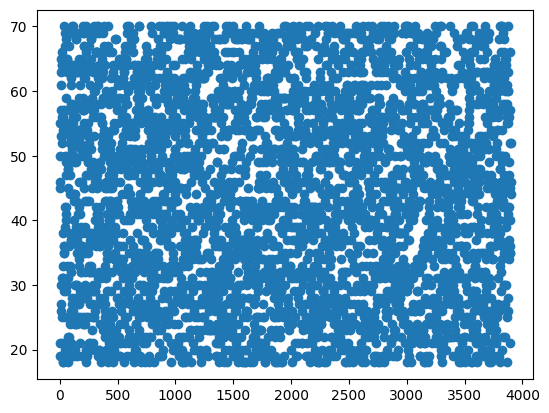

In [203]:
plt.scatter(clean_data['Customer ID'],clean_data['Age'])
# plotting the scatter plot of the customer ID and the age of the customers

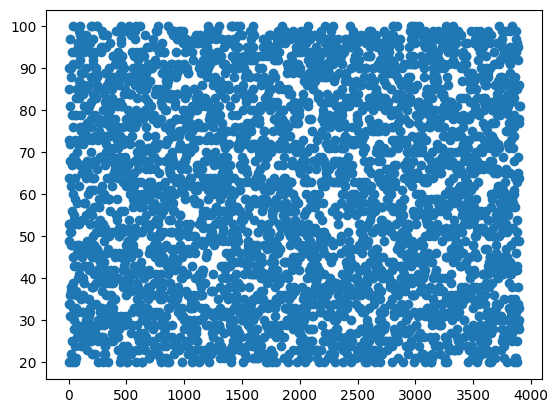

In [204]:
plt.scatter(clean_data['Customer ID'],clean_data['Purchase Amount (USD)'])
# plotting the scatter plot of the customer ID and the purchase amount of the customers


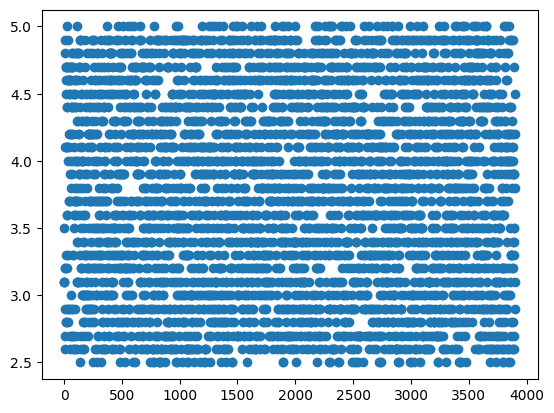

In [205]:
plt.scatter(clean_data['Customer ID'],clean_data['Review Rating'])
# plotting the scatter plot of the customer ID and the review rating of the customers

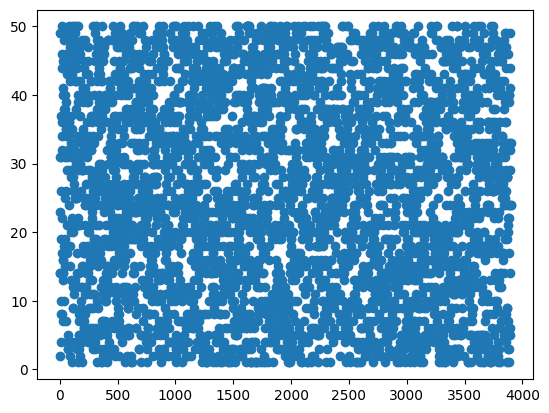

In [206]:
plt.scatter(clean_data['Customer ID'],clean_data['Previous Purchases'])
# plotting the scatter plot of the customer ID and the previous purchases of the customers


In [207]:
df # displaying the original data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [208]:
# This is data aggregation, we are checking multiple statistics for the dataset

# Total Revenue 
total_revenue = df['Purchase Amount (USD)'].sum()
print(f"Total Revenue: {total_revenue}")

# Average Purchase Amount
avg_purchase = df['Purchase Amount (USD)'].mean() 
print(f"Average Purchase Amount: {avg_purchase:.2f}")

# Most Popular Categories
categories = df['Category'].value_counts()
print("Most Popular Categories:")
print(categories.head())

# Most Popular Items Purchased  
items = df['Item Purchased'].value_counts()
print("\nMost Popular Items Purchased:")
print(items.head())  

# Most Popular Colors
colors = df['Color'].value_counts()
print("\nMost Popular Colors Purchased:")  
print(colors.head())

# Most Popular Payment Methods
payments = df['Payment Method'].value_counts()
print("\nMost Popular Payment Methods:")
print(payments.head())

Total Revenue: 233081
Average Purchase Amount: 59.76
Most Popular Categories:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Most Popular Items Purchased:
Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Most Popular Colors Purchased:
Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

Most Popular Payment Methods:
Payment Method
Credit Card    696
Venmo          653
Cash           648
PayPal         638
Debit Card     633
Name: count, dtype: int64


In [209]:
#this is some more data aggregation

states = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False) 
print("\nTop States by Total Revenue")  
print(states.head())

gender_size= df.groupby(['Gender', 'Size']).size().reset_index(name='purchases')
print("\nMost Popular Size Purchased by Gender")
print(gender_size.sort_values('purchases', ascending=False).head())

season_cat = df.groupby(['Category', 'Season']).size().reset_index(name='purchases')
print("\nMost Popular Seasons by Category")
print(season_cat.sort_values('purchases', ascending=False).head(10))

rating= df.groupby(['Category'])['Review Rating'].mean().reset_index()
print("\nAverage Rating by Category")
print(rating.sort_values('Review Rating', ascending=False))


Top States by Total Revenue
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64

Most Popular Size Purchased by Gender
   Gender Size  purchases
5    Male    M       1165
4    Male    L        716
1  Female    M        590
6    Male    S        476
0  Female    L        337

Most Popular Seasons by Category
       Category  Season  purchases
5      Clothing  Spring        454
7      Clothing  Winter        448
4      Clothing    Fall        427
6      Clothing  Summer        408
0   Accessories    Fall        324
2   Accessories  Summer        312
3   Accessories  Winter        303
1   Accessories  Spring        301
9      Footwear  Spring        163
10     Footwear  Summer        160

Average Rating by Category
      Category  Review Rating
2     Footwear       3.790651
0  Accessories       3.768629
3    Outerwear       3.746914
1     Clothing       3.723143


In [210]:
# this is some more data aggregation

print("\nTotal Revenue:")
total_revenue = df['Purchase Amount (USD)'].sum()
print(total_revenue)

print("\nAverage Purchase Amount:")  
avg_purchase = df['Purchase Amount (USD)'].mean()
print(avg_purchase)

print("\nMinimum and Maximum Purchase:")
purchase_min_max = df['Purchase Amount (USD)'].agg(['min', 'max'])  
print(purchase_min_max) 

print("\nAverage Age of Customers:")
avg_age = df['Age'].mean()
print(avg_age)

print("\nOldest and Youngest Ages:")  
age_min_max = df['Age'].agg(['min', 'max'])
print(age_min_max)

print("\nMost Popular States by Revenue:")
states = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head() 
print(states)

print("\nMost Popular Seasons by Category:") 
season_cat = df.groupby(['Category', 'Season']).size().reset_index(name='purchases').sort_values('purchases', ascending=False).head(10)
print(season_cat)


print("\nSummary Statistics by Category:")
category_stats = df.groupby(['Category'])['Purchase Amount (USD)'].describe()
print(category_stats)


Total Revenue:
233081

Average Purchase Amount:
59.76435897435898

Minimum and Maximum Purchase:
min     20
max    100
Name: Purchase Amount (USD), dtype: int64

Average Age of Customers:
44.06846153846154

Oldest and Youngest Ages:
min    18
max    70
Name: Age, dtype: int64

Most Popular States by Revenue:
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64

Most Popular Seasons by Category:
       Category  Season  purchases
5      Clothing  Spring        454
7      Clothing  Winter        448
4      Clothing    Fall        427
6      Clothing  Summer        408
0   Accessories    Fall        324
2   Accessories  Summer        312
3   Accessories  Winter        303
1   Accessories  Spring        301
9      Footwear  Spring        163
10     Footwear  Summer        160

Summary Statistics by Category:
              count       mean        std   min    25%   50%   75%    max
Category        

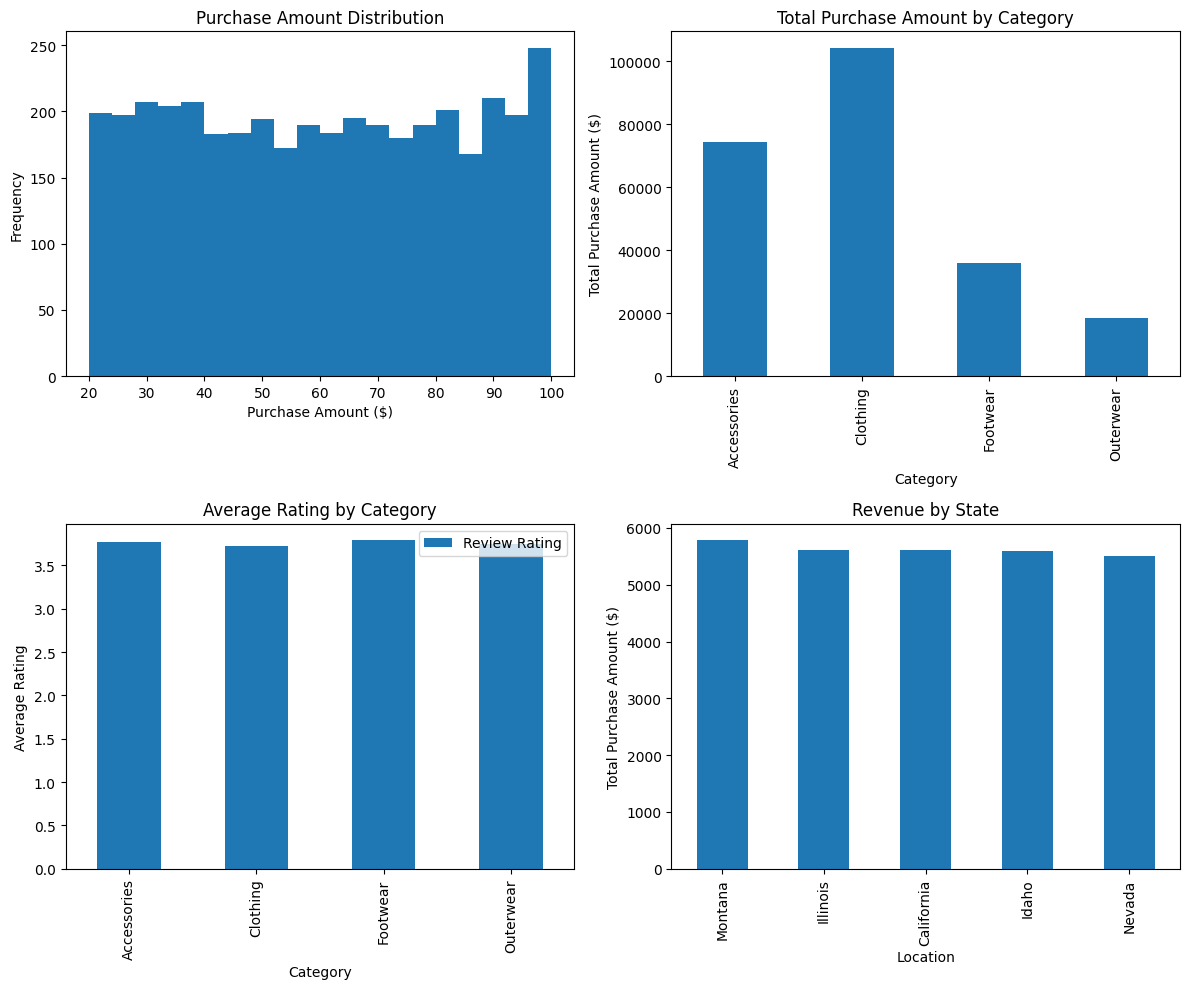

In [211]:
import matplotlib.pyplot as plt

# Set up 2x2 subplots grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Purchase Amount Distribution
ax1.hist(df['Purchase Amount (USD)'], bins=20)
ax1.set_title("Purchase Amount Distribution")  
ax1.set_xlabel("Purchase Amount ($)")
ax1.set_ylabel("Frequency")

# Purchase Amount by Category  
df.groupby(['Category'])['Purchase Amount (USD)'].sum().plot(kind='bar', ax=ax2)
ax2.set_title("Total Purchase Amount by Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Total Purchase Amount ($)")

# Average Rating by Category
rating.plot(x='Category', y='Review Rating', kind='bar', ax=ax3)  
ax3.set_title("Average Rating by Category")
ax3.set_ylabel("Average Rating")

# Revenue by State 
states.plot(kind='bar', ax=ax4)
ax4.set_title("Revenue by State") 
ax4.set_ylabel("Total Purchase Amount ($)")

fig.tight_layout()
plt.show()

In [212]:
#First we will be doing statrified sampling 
from sklearn.model_selection import StratifiedShuffleSplit

stratify_col = 'Gender'
required_samples = 1500

splitter = StratifiedShuffleSplit(n_splits=1, test_size=required_samples, random_state=42)

for train_index, sample_index in splitter.split(df, df[stratify_col]):   
    sample = df.loc[sample_index]
    
strat_sample = df.sample(n=required_samples, random_state=42)
strat_sample


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
839,840,48,Male,Shirt,Clothing,31,Illinois,L,Teal,Spring,2.6,Yes,Cash,Free Shipping,Yes,Yes,10,Debit Card,Every 3 Months
1717,1718,29,Male,Hoodie,Clothing,50,Hawaii,L,Orange,Summer,2.9,No,Cash,Express,No,No,16,Debit Card,Bi-Weekly
321,322,41,Male,Sneakers,Footwear,36,Vermont,L,Orange,Summer,4.7,Yes,Credit Card,Free Shipping,Yes,Yes,48,Debit Card,Quarterly
3187,3188,67,Female,Blouse,Clothing,72,Texas,L,Indigo,Winter,3.2,No,Credit Card,Free Shipping,No,No,28,Debit Card,Weekly
2269,2270,49,Male,Skirt,Clothing,38,Kentucky,M,Yellow,Fall,4.4,No,Credit Card,Store Pickup,No,No,27,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,3304,20,Female,Belt,Accessories,60,Mississippi,S,Turquoise,Summer,3.4,No,PayPal,Next Day Air,No,No,4,Credit Card,Fortnightly
2042,2043,19,Male,Shoes,Footwear,52,Alabama,M,Red,Spring,4.0,No,Credit Card,2-Day Shipping,No,No,35,Venmo,Monthly
979,980,64,Male,Hat,Accessories,33,New Hampshire,S,Brown,Fall,3.5,Yes,Venmo,Store Pickup,Yes,Yes,34,Debit Card,Monthly
1423,1424,51,Male,Sandals,Footwear,60,Michigan,S,Black,Fall,3.5,No,PayPal,Free Shipping,Yes,Yes,12,Venmo,Every 3 Months


In [213]:
strat_sample.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1919.888000,43.872667,59.442000,3.755333,25.260667
std,1135.729958,15.269661,23.669815,0.723257,14.319780
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,942.500000,30.750000,38.000000,3.200000,13.000000
50%,1897.500000,44.000000,59.000000,3.700000,25.000000
75%,2882.500000,57.000000,80.000000,4.400000,37.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [214]:

# For simple random sampling
random_sample = df.sample(n=390)  # Or a fraction can be used
random_sample

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
952,953,36,Male,Hat,Accessories,71,Idaho,S,Red,Fall,3.1,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,28,PayPal,Monthly
661,662,57,Male,Shirt,Clothing,68,Iowa,XL,Green,Fall,4.1,Yes,Cash,Store Pickup,Yes,Yes,39,Credit Card,Quarterly
3244,3245,65,Female,Sweater,Clothing,81,Arkansas,M,Black,Fall,4.7,No,Bank Transfer,Express,No,No,42,Credit Card,Annually
1906,1907,23,Male,Backpack,Accessories,30,Vermont,M,Green,Spring,4.6,No,Bank Transfer,2-Day Shipping,No,No,24,PayPal,Fortnightly
3829,3830,69,Female,Pants,Clothing,32,Washington,M,Indigo,Spring,2.9,No,Credit Card,Free Shipping,No,No,32,Debit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,67,31,Male,Blouse,Clothing,94,Pennsylvania,S,Magenta,Winter,4.7,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,3,Venmo,Every 3 Months
3610,3611,18,Female,Jacket,Outerwear,86,Texas,XL,Green,Fall,4.8,No,Credit Card,2-Day Shipping,No,No,23,Bank Transfer,Fortnightly
2172,2173,28,Male,Skirt,Clothing,89,Rhode Island,S,Lavender,Fall,2.8,No,Bank Transfer,Store Pickup,No,No,6,PayPal,Fortnightly
2846,2847,50,Female,Socks,Clothing,36,Oklahoma,XL,Black,Fall,2.8,No,Cash,Next Day Air,No,No,15,PayPal,Bi-Weekly


In [215]:
random_sample.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,1914.156410,43.138462,57.302564,3.756154,25.635897
std,1135.935699,15.429125,23.901162,0.708669,14.170854
min,2.000000,18.000000,20.000000,2.600000,1.000000
25%,883.500000,30.000000,36.000000,3.100000,13.250000
50%,1914.500000,43.000000,56.000000,3.800000,26.000000
75%,2856.750000,56.000000,80.000000,4.400000,38.000000
max,3894.000000,70.000000,100.000000,5.000000,50.000000


In [216]:

# For cluster sampling, assuming 'location' as cluster
# First, identify unique clusters
clusters = df['Location'].unique()
# Randomly select a few clusters, for example 3
selected_clusters = np.random.choice(clusters, 3, replace=False)
# Get all rows from these clusters
cluster_sample = df[df['Location'].isin(selected_clusters)]
cluster_sample


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
17,18,53,Male,Dress,Clothing,38,Mississippi,XL,Lavender,Winter,4.7,Yes,Debit Card,2-Day Shipping,Yes,Yes,36,Venmo,Quarterly
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Credit Card,Express,Yes,Yes,50,Cash,Every 3 Months
37,38,35,Male,Jeans,Clothing,45,Indiana,S,Cyan,Summer,2.8,Yes,Debit Card,Store Pickup,Yes,Yes,10,PayPal,Weekly
40,41,69,Male,Handbag,Accessories,76,Louisiana,L,Beige,Winter,4.6,Yes,PayPal,Next Day Air,Yes,Yes,31,Debit Card,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,3842,68,Female,Jeans,Clothing,57,Mississippi,L,Pink,Fall,4.2,No,Cash,2-Day Shipping,No,No,8,Bank Transfer,Monthly
3850,3851,27,Female,Jewelry,Accessories,74,Mississippi,L,Indigo,Summer,4.4,No,Credit Card,2-Day Shipping,No,No,25,Debit Card,Every 3 Months
3852,3853,65,Female,Hat,Accessories,79,Mississippi,M,Peach,Fall,4.0,No,Credit Card,2-Day Shipping,No,No,19,PayPal,Weekly
3859,3860,65,Female,Shorts,Clothing,88,Mississippi,S,Blue,Fall,3.0,No,Credit Card,2-Day Shipping,No,No,47,Bank Transfer,Bi-Weekly


In [217]:
cluster_sample.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,243.000000,243.000000,243.000000,243.000000,243.000000
mean,1854.448560,46.510288,59.201646,3.778189,25.061728
std,1100.421659,15.617420,22.985184,0.736572,14.334273
min,8.000000,18.000000,21.000000,2.500000,1.000000
25%,956.500000,32.000000,37.500000,3.100000,13.500000
50%,1702.000000,47.000000,59.000000,3.800000,24.000000
75%,2784.000000,61.000000,78.000000,4.500000,37.500000
max,3874.000000,70.000000,99.000000,5.000000,50.000000


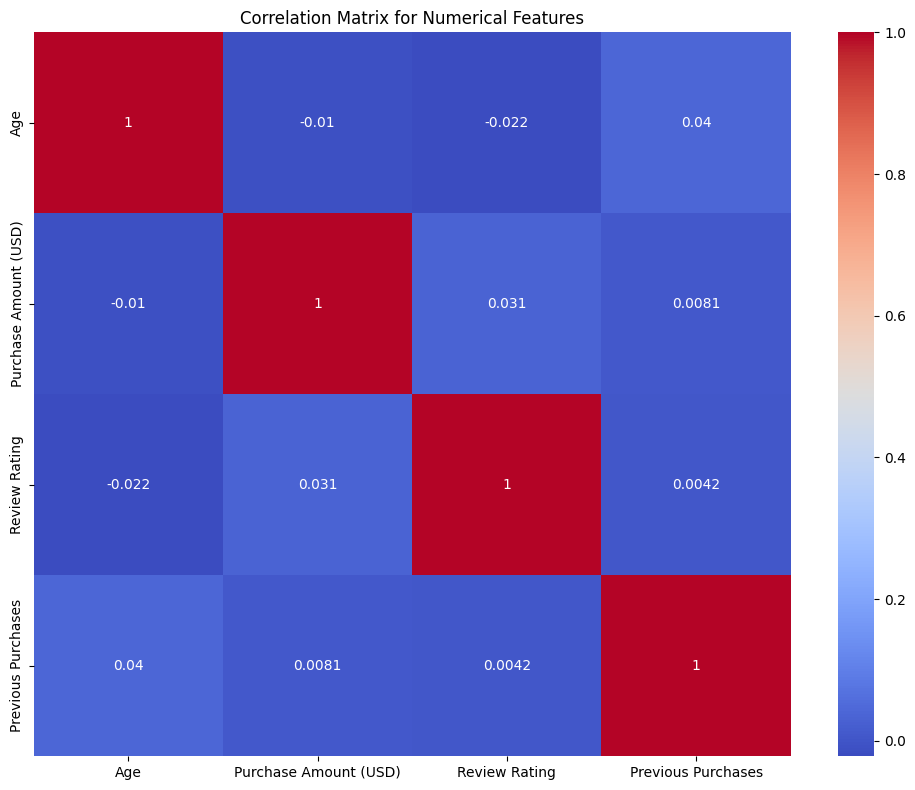

In [218]:
import seaborn as sns


# Select only numerical columns 
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# List of numerical columns
num_cols = list(numerical_data.columns)

# Create correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr_mat = numerical_data[num_cols].corr()
sns.heatmap(corr_mat, 
            xticklabels=num_cols,
            yticklabels=num_cols,
            cmap='coolwarm',
            annot=True,
            ax=ax)

ax.set_title("Correlation Matrix for Numerical Features")
fig.tight_layout()  
plt.show()

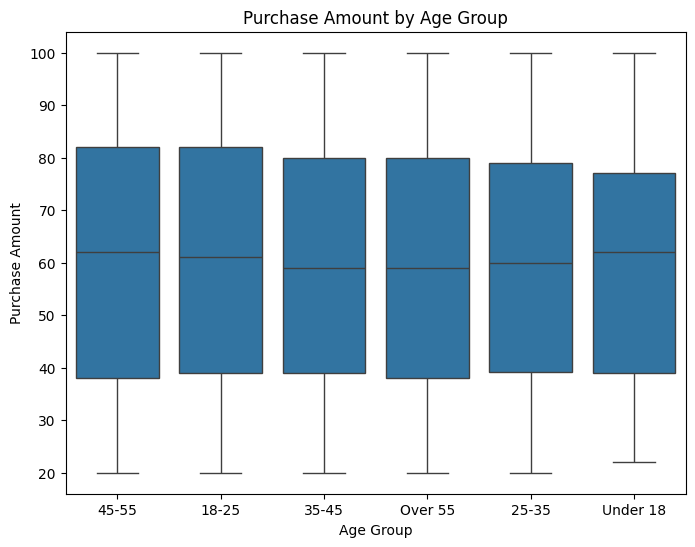

In [219]:
# Create age group bins

#discretizing the age column

bins = [0, 18, 25, 35, 45, 55, np.inf] 
labels = ['Under 18', '18-25', '25-35', '35-45', '45-55', 'Over 55']

# Use cut() and convert categories to strings
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels).astype(str)




fig, ax = plt.subplots(figsize=(8, 6)) 
sns.boxplot(x="age_group", y="Purchase Amount (USD)", data=df, ax=ax)

ax.set_title("Purchase Amount by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Purchase Amount")   

plt.show()

In [220]:
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# List of numerical columns
num_cols = list(numerical_data.columns)



In [221]:


# Scale numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


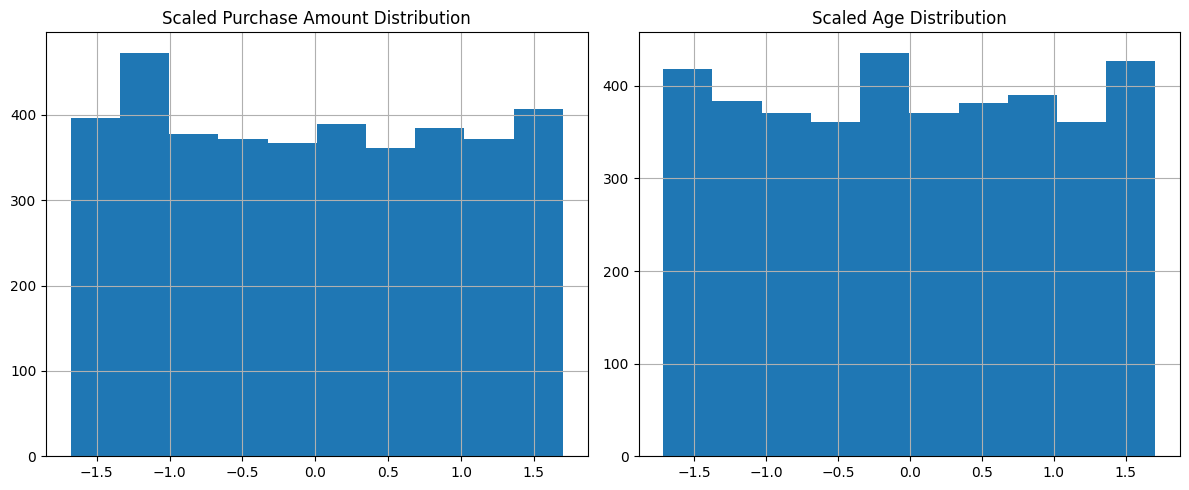

In [222]:
#scaled data plots


# Histogram 
fig, ax = plt.subplots(1,2, figsize=(12,5)) 
numerical_data_scaled['Purchase Amount (USD)'].hist(ax=ax[0])  
ax[0].set_title("Scaled Purchase Amount Distribution")

numerical_data_scaled['Age'].hist(ax=ax[1])  
ax[1].set_title("Scaled Age Distribution")

fig.tight_layout()
plt.show()



In [223]:
df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [224]:
from sklearn.preprocessing import LabelEncoder
# Define high vs low cardinality threshold 
high_cardinality = 3

# List of categorical features to encode  
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 
                    'Color', 'Season', 'Subscription Status', 'Payment Method',
                    'Shipping Type', 'Preferred Payment Method', 
                    'Frequency of Purchases',  'age_group']

# Frequency encoding as the cardinality is high
for col in categorical_cols:
    if df[col].nunique() > high_cardinality:
        df[col] = df[col].map(df[col].value_counts()/len(df))
		




df = pd.get_dummies(df, columns=["Gender"])

for col in ['Gender_Male', 'Gender_Female']:
    df[col] = df[col].astype(int)

# Label Encoding the size as there is a natural order


# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform Size column
df['Size'] = le.fit_transform(df['Size'])


# Discount, Promo code and subscription status are mapped as they are binary
df['Discount Applied'] = df['Discount Applied'].map({'Yes':1, 'No':0})
df['Promo Code Used'] = df['Promo Code Used'].map({'Yes':1, 'No':0})
df['Subscription Status'] = df['Subscription Status'].map({'Yes':1, 'No':0})

df

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,age_group,Gender_Female,Gender_Male
0,1,55,0.043846,0.445385,53,0.020256,2,0.040769,0.248974,3.1,...,0.178462,0.165641,1,1,14,0.162564,0.138974,0.193077,0,1
1,2,19,0.042051,0.445385,64,0.019744,2,0.040513,0.248974,3.1,...,0.162051,0.165641,1,1,2,0.171795,0.138974,0.128718,0,1
2,3,50,0.031795,0.445385,73,0.018462,1,0.040513,0.256154,3.1,...,0.166154,0.173077,1,1,23,0.172051,0.138205,0.193077,0,1
3,4,21,0.041026,0.153590,90,0.016154,3,0.040513,0.256154,3.5,...,0.163590,0.166154,1,1,49,0.173590,0.138205,0.128718,0,1
4,5,45,0.043846,0.445385,49,0.018974,3,0.037179,0.256154,2.7,...,0.166154,0.173077,1,1,31,0.173590,0.146667,0.186923,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0.038718,0.445385,28,0.019744,2,0.037179,0.244872,4.2,...,0.166154,0.160769,0,0,32,0.162564,0.138205,0.186923,1,0
3896,3897,52,0.036667,0.317949,49,0.017692,2,0.036410,0.256154,4.5,...,0.163590,0.166667,0,0,41,0.156923,0.140256,0.193077,1,0
3897,3898,46,0.041282,0.317949,33,0.017179,2,0.043333,0.256154,2.9,...,0.178462,0.167692,0,0,24,0.162564,0.144359,0.193077,1,0
3898,3899,44,0.038462,0.153590,77,0.022564,1,0.036154,0.244872,3.8,...,0.163590,0.165641,0,0,24,0.162564,0.138205,0.186923,1,0


In [225]:
df[numerical_data.columns] = numerical_data_scaled

df.drop('Item Purchased', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Shipping Type', axis=1, inplace=True)
df.drop('Preferred Payment Method', axis=1, inplace=True)
df.drop('Payment Method', axis=1, inplace=True)
df.drop('Category', axis=1, inplace=True)
df.drop('Color', axis=1, inplace=True)
df.drop('Season', axis=1, inplace=True)

In [226]:
df

,Customer ID,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,age_group,Gender_Female,Gender_Male
0,1,0.718913,-0.285629,2,-0.907584,1,1,1,-0.785831,0.138974,0.193077,0,1
1,2,-1.648629,0.178852,2,-0.907584,1,1,1,-1.616552,0.138974,0.128718,0,1
2,3,0.390088,0.558882,1,-0.907584,1,1,1,-0.162789,0.138205,0.193077,0,1
3,4,-1.517099,1.276716,3,-0.349027,1,1,1,1.637107,0.138205,0.128718,0,1
4,5,0.061263,-0.454531,3,-1.466141,1,1,1,0.391025,0.146667,0.186923,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,-0.267563,-1.341267,2,0.628448,0,0,0,0.460252,0.138205,0.186923,1,0
3896,3897,0.521618,-0.454531,2,1.047366,0,0,0,1.083293,0.140256,0.193077,1,0
3897,3898,0.127028,-1.130139,2,-1.186862,0,0,0,-0.093563,0.144359,0.193077,1,0
3898,3899,-0.004502,0.727784,1,0.069891,0,0,0,-0.093563,0.138205,0.186923,1,0


In [227]:

from sklearn.manifold import TSNE


# Drop customer ID
df.drop(['Customer ID'], axis=1, inplace=True)

# Define features 
X = df.iloc[:, 1:] 
print(X)

# Create TSNE instance
tsne = TSNE(n_components=2, learning_rate='auto', init='random')

# Fit and transform data to get 2d embeddings
X_embedded = tsne.fit_transform(X)

# Add new dimensions to dataframe
df_TSME = pd.DataFrame(X_embedded, columns=['Dim_1', 'Dim_2'])


df
df_TSME

      Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0                 -0.285629     2      -0.907584                    1   
1                  0.178852     2      -0.907584                    1   
2                  0.558882     1      -0.907584                    1   
3                  1.276716     3      -0.349027                    1   
4                 -0.454531     3      -1.466141                    1   
...                     ...   ...            ...                  ...   
3895              -1.341267     2       0.628448                    0   
3896              -0.454531     2       1.047366                    0   
3897              -1.130139     2      -1.186862                    0   
3898               0.727784     1       0.069891                    0   
3899               0.896686     3      -0.907584                    0   

      Discount Applied  Promo Code Used  Previous Purchases  \
0                    1                1           -0.785831 

,Dim_1,Dim_2
0,-32.978237,-0.887236
1,-32.121174,3.025609
2,-23.462017,-16.705078
3,-67.398621,26.912830
4,-66.872101,14.747017
...,...,...
3895,44.946644,11.200205
3896,47.407036,13.628349
3897,31.801167,20.930719
3898,50.544891,-1.011897


In [228]:
import pandas as pd 
from sklearn.decomposition import PCA



# Drop customer ID 


# Define features
X = df.iloc[:, 1:]

# Create PCA instance 
pca = PCA(n_components=2)

# Fit and transform data 
X_pca = pca.fit_transform(X)

# Convert to dataframe
df_pca = pd.DataFrame(X_pca)

# Rename columns
df_pca.columns = ['PC1', 'PC2']  

df_pca

,PC1,PC2
0,-0.494399,0.902556
1,-0.406606,1.031621
2,0.564354,0.414122
3,-0.524087,-2.027744
4,-1.595238,0.127401
...,...,...
3895,0.001332,0.501378
3896,0.470509,-0.551263
3897,-0.899210,1.164971
3898,1.043657,-0.031533


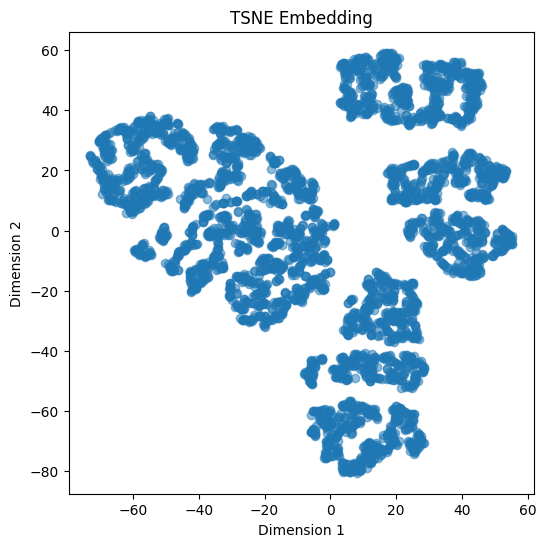

In [229]:


fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_TSME['Dim_1'], df_TSME['Dim_2'], alpha=0.5)
ax.set_title('TSNE Embedding')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.show()

/var/folders/30/hh09bz3d3js8y5gnp90fyfh40000gn/T/ipykernel_51193/2174840638.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_TSME, x='Dim_1', y='Dim_2', shade=True)


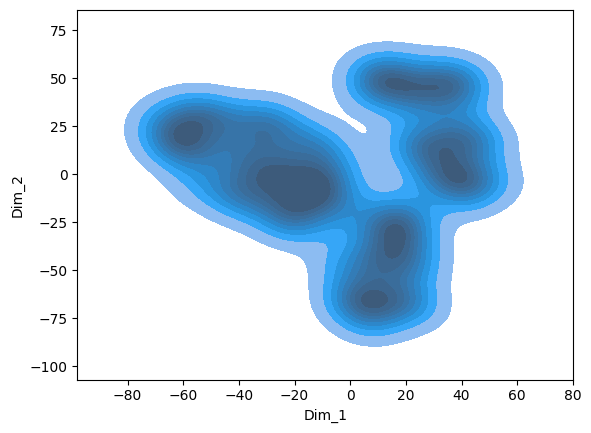

In [230]:
#KDE plot to show density:

sns.kdeplot(data=df_TSME, x='Dim_1', y='Dim_2', shade=True)

plt.show()

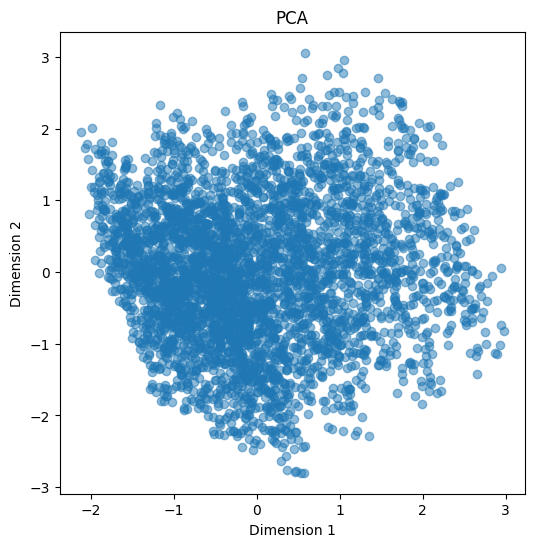

In [231]:


fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
ax.set_title('PCA')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.show()

/var/folders/30/hh09bz3d3js8y5gnp90fyfh40000gn/T/ipykernel_51193/821784715.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_pca, x='PC1', y='PC2', shade=True)


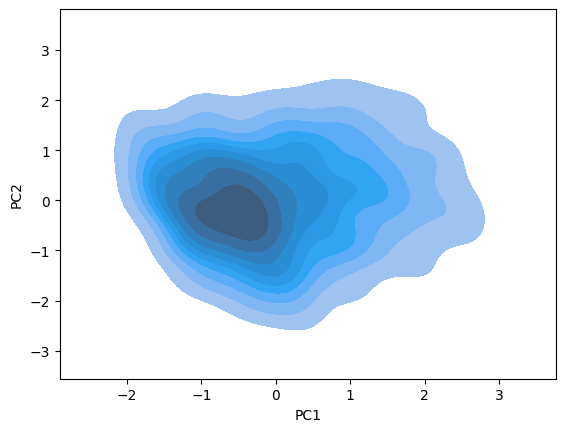

In [232]:
sns.kdeplot(data=df_pca, x='PC1', y='PC2', shade=True)
plt.show()


How PCA Differs from t-SNE:
PCA is a linear dimensionality reduction technique that projects data onto a lower-dimensional space using orthogonal transformation. It aims to preserve as much variance as possible in the dataset by transforming the original variables into a new set of variables (principal components) which are uncorrelated and ordered by the amount of variance they capture from the data.
t-SNE, on the other hand, is a non-linear technique particularly well-suited for embedding high-dimensional data into a space of two or three dimensions. It works by converting affinities of data points to probabilities and tries to minimize the divergence between the probability distribution in the high-dimensional space and the low-dimensional space. This often results in a plot where local structures are preserved and similar data points form distinct clusters.
Which One Works Better for the Clustering Task:
The t-SNE plot shows several clearly defined clusters that are well-separated from each other. This indicates that t-SNE is very effective at revealing the local structure of the data and the existence of clusters that might not be apparent in the original high-dimensional space.
The PCA plot, in contrast, seems to suggest that the data points are more spread out and do not form distinct clusters. While PCA does reduce dimensionality, it does not necessarily preserve the local structure and relationships between data points in the same way t-SNE does.
Why One Is Better Than the Other for This Specific Task:
For clustering tasks where the goal is to identify distinct groups or segments within the data, t-SNE is generally more effective because it is designed to keep similar data points together and separate dissimilar ones, which is essential for identifying clusters.
PCA might be less effective for clustering if the principal components do not capture the underlying cluster structure of the data. It is possible that the principal components reflect variance in the data that is not related to the clusters you are trying to identify.
Based on the visualizations provided, t-SNE would likely be the better choice for clustering in this case, as it provides a clearer separation of clusters which can be used to inform marketing strategies by identifying distinct customer segments.

However, it is important to note that t-SNE visualizations can sometimes be misleading if the perplexity parameter is not chosen carefully, and the results can vary depending on the random seed used. Therefore, t-SNE results should not be the sole basis for critical decisions. It's also advisable to validate the clustering results with additional clustering metrics and, if possible, corroborate the findings with domain knowledge or additional data.

Without access to the raw data, this analysis is based solely on the provided visualizations. For a more in-depth analysis, we would need to examine the raw data to understand the feature distributions and how they relate to the clusters formed in the t-SNE and PCA visualizations.

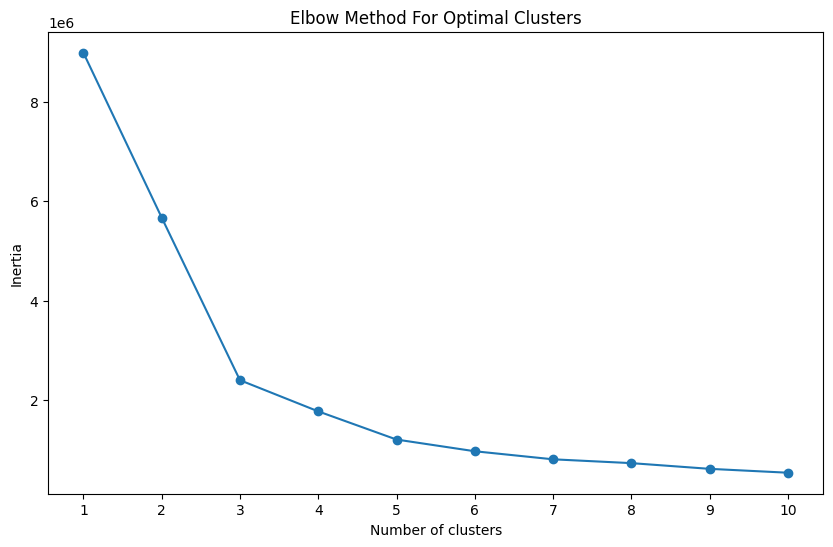

In [233]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_TSME is already loaded with the T-SNE reduced data
# Let's start with the elbow method to find the optimal number of clusters

# Range of potential clusters
range_clusters = range(1, 11)

# List to store the inertia for each cluster count
inertias = []

for n_clusters in range_clusters:
    # Initialize KMeans with current number of clusters
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(df_TSME)
    # Append the model's inertia (Sum of squared distances of samples to their closest cluster center.)
    inertias.append(model.inertia_)

# Plotting the elbow graph to find the optimum number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Clusters')
plt.xticks(range_clusters)
plt.show()


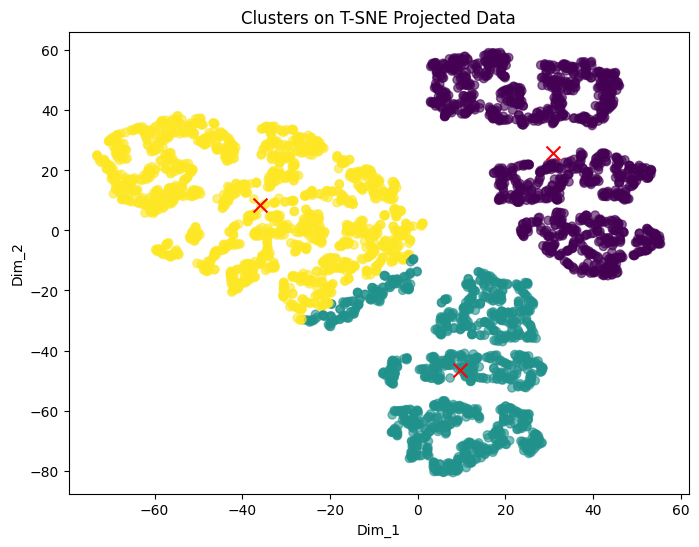

In [234]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model on the T-SNE output
kmeans.fit(df_TSME)

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_

# Plotting the clusters along with their centers
plt.figure(figsize=(8, 6))
plt.scatter(df_TSME['Dim_1'], df_TSME['Dim_2'], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Clusters on T-SNE Projected Data')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.show()


In [235]:
# Assign cluster labels to the original data
df['Cluster'] = labels

# Calculate the mean of the features for each cluster
cluster_feature_means = df.groupby('Cluster').mean()

# Now cluster_feature_means contains the mean value of each feature for each cluster
print(cluster_feature_means)


              Age  Purchase Amount (USD)      Size  Review Rating  \
Cluster                                                             
0       -0.004028               0.020473  2.108173      -0.011901   
1       -0.011381               0.032643  1.770965       0.012348   
2        0.011438              -0.040020  2.228775       0.000750   

         Subscription Status  Discount Applied  Promo Code Used  \
Cluster                                                           
0                   0.000000           0.00000          0.00000   
1                   0.072137           0.12083          0.12083   
2                   0.630590           1.00000          1.00000   

         Previous Purchases  Frequency of Purchases  age_group  Gender_Female  \
Cluster                                                                         
0                 -0.052293                0.142954   0.205509            1.0   
1                  0.025415                0.143036   0.204730            0

In [236]:
num_cols

['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

In [237]:
cluster_feature_means[num_cols] = scaler.inverse_transform(cluster_feature_means[num_cols])

In [238]:
cluster_feature_means

,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,age_group,Gender_Female,Gender_Male
Cluster,,,,,,,,,,,,
0,44.007212,60.249199,2.108173,3.741426,0.000000,0.00000,0.00000,24.596154,0.142954,0.205509,1.0,0.0
1,43.895401,60.537421,1.770965,3.758792,0.072137,0.12083,0.12083,25.718665,0.143036,0.204730,0.0,1.0
2,44.242385,58.816591,2.228775,3.750486,0.630590,1.00000,1.00000,25.698639,0.142925,0.206237,0.0,1.0


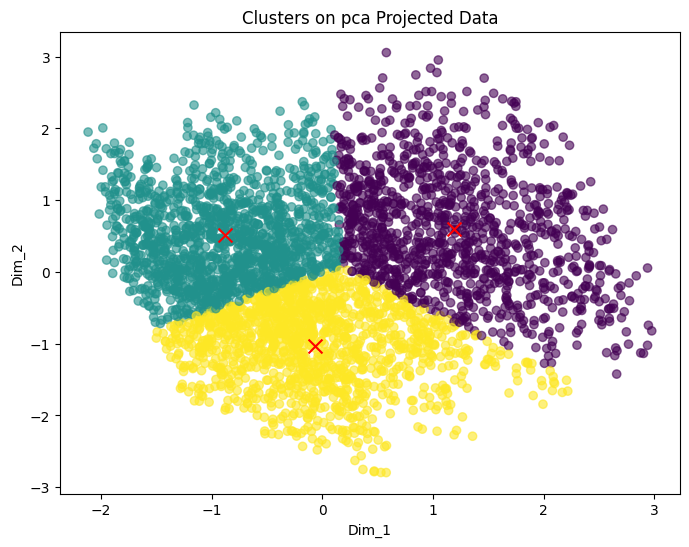

In [239]:


# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model on the T-SNE output
kmeans.fit(df_pca)

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_

# Plotting the clusters along with their centers
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.title('Clusters on pca Projected Data')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.show()


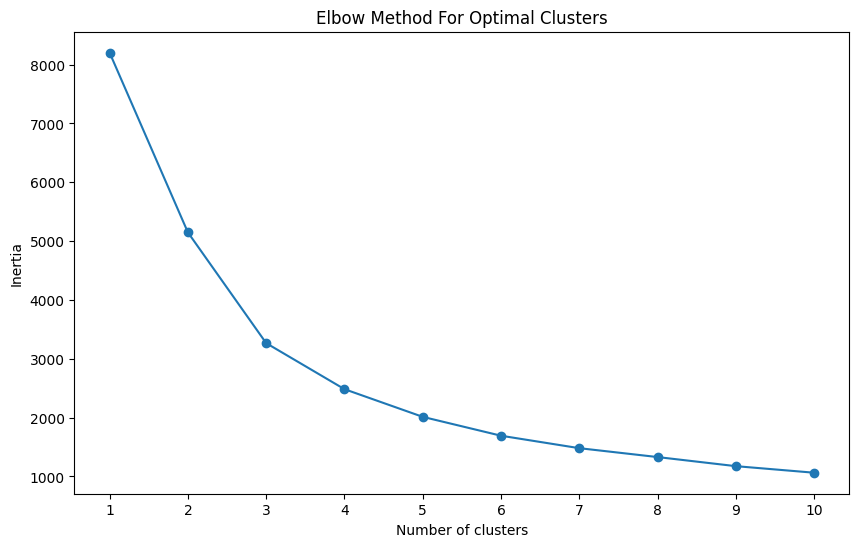

In [240]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_TSME is already loaded with the T-SNE reduced data
# Let's start with the elbow method to find the optimal number of clusters

# Range of potential clusters
range_clusters = range(1, 11)

# List to store the inertia for each cluster count
inertias = []

for n_clusters in range_clusters:
    # Initialize KMeans with current number of clusters
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(df_pca)
    # Append the model's inertia (Sum of squared distances of samples to their closest cluster center.)
    inertias.append(model.inertia_)

# Plotting the elbow graph to find the optimum number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Clusters')
plt.xticks(range_clusters)
plt.show()


In [241]:
# Assign cluster labels to the original data
df['Cluster'] = labels

# Calculate the mean of the features for each cluster
cluster_feature_means = df.groupby('Cluster').mean()

# Now cluster_feature_means contains the mean value of each feature for each cluster
print(cluster_feature_means)


              Age  Purchase Amount (USD)      Size  Review Rating  \
Cluster                                                             
0       -0.020197              -0.052091  0.776492       0.316964   
1       -0.001509              -0.620121  2.591036      -0.530127   
2        0.018411               0.699801  2.566345       0.297310   

         Subscription Status  Discount Applied  Promo Code Used  \
Cluster                                                           
0                   0.273375          0.451469         0.451469   
1                   0.275210          0.418768         0.418768   
2                   0.261675          0.424018         0.424018   

         Previous Purchases  Frequency of Purchases  age_group  Gender_Female  \
Cluster                                                                         
0                 -0.223139                0.142889   0.204281       0.292965   
1                 -0.302310                0.142936   0.205449       0.3431

(3900,)

In [242]:
cluster_feature_means[num_cols] = scaler.inverse_transform(cluster_feature_means[num_cols])


In [243]:
cluster_feature_means

,Age,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,age_group,Gender_Female,Gender_Male
Cluster,,,,,,,,,,,,
0,43.761354,58.530721,0.776492,3.976937,0.273375,0.451469,0.451469,22.128228,0.142889,0.204281,0.292965,0.707035
1,44.045518,45.078431,2.591036,3.370308,0.275210,0.418768,0.418768,20.984594,0.142936,0.205449,0.343137,0.656863
2,44.348406,76.337287,2.566345,3.962861,0.261675,0.424018,0.424018,32.657524,0.143062,0.206788,0.318013,0.681987


In [250]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
df_pca['Cluster'] = kmeans.labels_

# Silhouette Coefficient
silhouette = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])

# Dunn Index - Calculation requires distance matrix
def dunn_index(data, labels):
    distances = pdist(data)
    distance_matrix = squareform(distances)
    unique_clusters = np.unique(labels)
    
    min_intercluster = np.inf
    max_intracluster = 0
    
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                data_i = data[labels == i]
                data_j = data[labels == j]
                intercluster_distance = np.min(distance_matrix[labels == i, :][:, labels == j])
                min_intercluster = min(min_intercluster, intercluster_distance)
    
    for k in unique_clusters:
        data_k = data[labels == k]
        if data_k.shape[0] > 1:  # Avoid division by zero
            intracluster_distance = np.max(pdist(data_k))
            max_intracluster = max(max_intracluster, intracluster_distance)
    
    return min_intercluster / max_intracluster

dunn = dunn_index(df_pca[['PC1', 'PC2']].values, df_pca['Cluster'].values)

print(f"Silhouette Coefficient: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Dunn Index: {dunn}")


Silhouette Coefficient: 0.3725267769702877
Davies-Bouldin Index: 0.8682745091184535
Dunn Index: 0.0019830319741251288


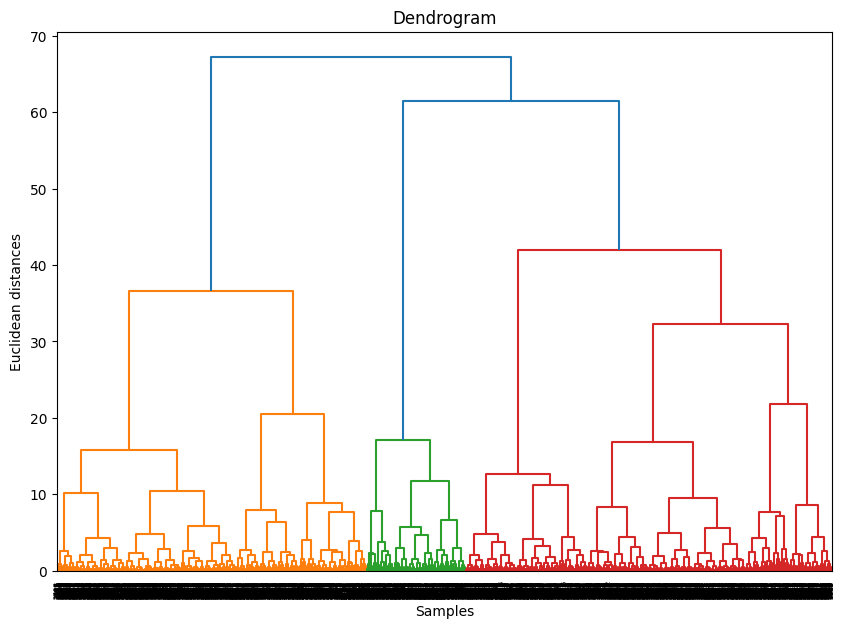

Optimal max_d: 42.406865800014145 with Silhouette Coefficient: 0.2878054344365764
Number of clusters found: 3


In [251]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df_pca is already defined and contains the principal components 'PC1' and 'PC2'

# Perform Hierarchical Clustering
Z = linkage(df_pca[['PC1', 'PC2']], method='ward')

# Plotting the dendrogram for visual inspection (optional)
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Determine the range for max_d by inspecting the dendrogram visually
min_d = 0.5 * np.max(Z[:, 2])
max_d = 1.5 * np.max(Z[:, 2])
d_range = np.linspace(min_d, max_d, 100)

best_silhouette = -1
best_d = None

# Searching for the optimal max_d
for d in d_range:
    clusters = fcluster(Z, d, criterion='distance')
    if len(np.unique(clusters)) > 1:  # To ensure at least two clusters
        silhouette = silhouette_score(df_pca[['PC1', 'PC2']], clusters)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_d = d

print(f"Optimal max_d: {best_d} with Silhouette Coefficient: {best_silhouette}")

# Using the optimal max_d to create final cluster assignment
optimal_clusters = fcluster(Z, best_d, criterion='distance')
df_pca['OptimalHCluster'] = optimal_clusters

# Display results
print(f"Number of clusters found: {len(np.unique(optimal_clusters))}")


In [252]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

# Assuming df_pca contains 'PC1' and 'PC2'

# Hierarchical Clustering
Z = linkage(df_pca[['PC1', 'PC2']], method='ward')

# Function to calculate the Dunn Index
def dunn_index(data, labels):
    distances = pdist(data)
    distance_matrix = squareform(distances)
    unique_clusters = np.unique(labels)
    
    min_intercluster = np.inf
    max_intracluster = 0
    
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                data_i = data[labels == i]
                data_j = data[labels == j]
                intercluster_distance = np.min(distance_matrix[labels == i, :][:, labels == j])
                min_intercluster = min(min_intercluster, intercluster_distance)
    
    for k in unique_clusters:
        data_k = data[labels == k]
        if data_k.shape[0] > 1:  # Avoid division by zero
            intracluster_distance = np.max(pdist(data_k))
            max_intracluster = max(max_intracluster, intracluster_distance)
    
    return min_intercluster / max_intracluster

# Range for max_d
min_d = 0.5 * np.max(Z[:, 2])
max_d = 1.5 * np.max(Z[:, 2])
d_range = np.linspace(min_d, max_d, 100)

best_score = -1
best_d = None

# Automated search for the best max_d
for d in d_range:
    clusters = fcluster(Z, d, criterion='distance')
    if len(np.unique(clusters)) > 1:  # At least two clusters needed to compute metrics
        silhouette = silhouette_score(df_pca[['PC1', 'PC2']], clusters)
        if silhouette > best_score:
            best_score = silhouette
            best_d = d
            # Compute other metrics
            davies_bouldin = davies_bouldin_score(df_pca[['PC1', 'PC2']], clusters)
            dunn = dunn_index(df_pca[['PC1', 'PC2']].values, clusters)

print(f"Optimal max_d: {best_d} with Silhouette Coefficient: {best_score}")
print(f"Davies-Bouldin Index at optimal max_d: {davies_bouldin}")
print(f"Dunn Index at optimal max_d: {dunn}")

# Final cluster assignment


Optimal max_d: 42.406865800014145 with Silhouette Coefficient: 0.2878054344365764
Davies-Bouldin Index at optimal max_d: 1.0264757032313339
Dunn Index at optimal max_d: 0.005424219822674886


In [253]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

# Assuming df_pca contains 'PC1' and 'PC2'

# Function to calculate the Dunn Index
def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2 or -1 in unique_clusters:
        return 0  # Cannot compute Dunn index if there are less than two clusters or noise only
    distances = pdist(data)
    distance_matrix = squareform(distances)
    
    min_intercluster = np.inf
    max_intracluster = 0
    
    for i in unique_clusters:
        if i == -1:  # Skip noise
            continue
        for j in unique_clusters:
            if i != j and j != -1:
                intercluster_distance = np.min(distance_matrix[labels == i, :][:, labels == j])
                min_intercluster = min(min_intercluster, intercluster_distance)
    
    for k in unique_clusters:
        if k == -1:  # Skip noise
            continue
        data_k = data[labels == k]
        intracluster_distance = np.max(pdist(data_k))
        max_intracluster = max(max_intracluster, intracluster_distance)
    
    return min_intercluster / max_intracluster if max_intracluster != 0 else 0

# Parameters for DBSCAN
eps_values = np.linspace(0.1, 2.0, 100)  # Varying eps
min_samples = 5  # Constant min_samples

best_silhouette = -1
best_eps = None

# Automated search for the best eps
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df_pca[['PC1', 'PC2']])
    labels = db.labels_
    
    # Need at least two clusters (not including noise) to calculate metrics
    if len(np.unique(labels)) - (1 if -1 in labels else 0) > 1:
        silhouette = silhouette_score(df_pca[['PC1', 'PC2']], labels)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps
            # Compute other metrics
            davies_bouldin = davies_bouldin_score(df_pca[['PC1', 'PC2']], labels)
            dunn = dunn_index(df_pca[['PC1', 'PC2']].values, labels)

print(f"Optimal eps: {best_eps} with Silhouette Coefficient: {best_silhouette}")
print(f"Davies-Bouldin Index at optimal eps: {davies_bouldin}")
print(f"Dunn Index at optimal eps: {dunn}")

# Final DBSCAN clustering with optimal eps
db_optimal = DBSCAN(eps=best_eps, min_samples=min_samples).fit(df_pca[['PC1', 'PC2']])
df_pca['DBSCANCluster'] = db_optimal.labels_

# Display results
print(f"Clusters found: {np.unique(db_optimal.labels_)}")


Optimal eps: 0.21515151515151515 with Silhouette Coefficient: 0.2662785154725464
Davies-Bouldin Index at optimal eps: 1.1242651846819658
Dunn Index at optimal eps: 0
Clusters found: [-1  0  1]


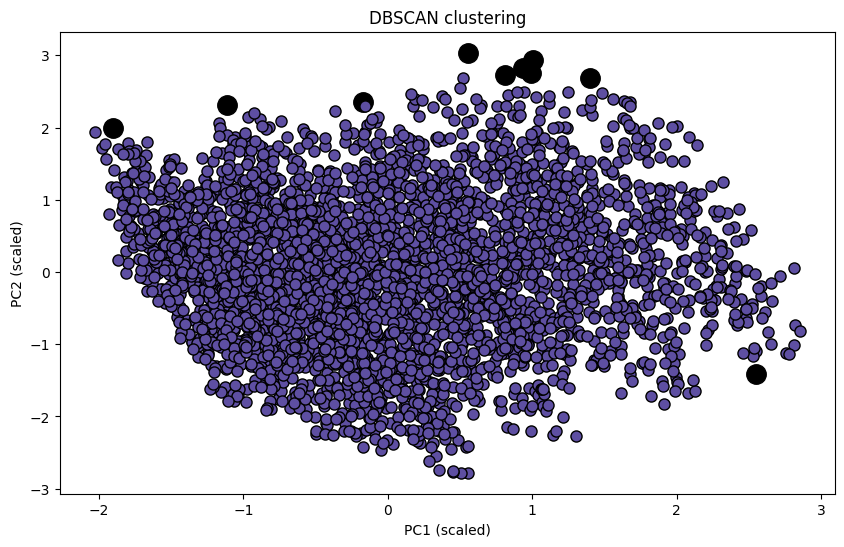

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming df_pca contains 'PC1' and 'PC2'

# Scaling the data - important for DBSCAN
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_pca[['PC1', 'PC2']])

# DBSCAN clustering with optimal parameters determined earlier
db_optimal = DBSCAN(eps=best_eps, min_samples=min_samples).fit(data_scaled)
df_pca['DBSCANCluster'] = db_optimal.labels_

# Plotting the results
plt.figure(figsize=(10, 6))
unique_labels = np.unique(db_optimal.labels_)

# Generate a color palette for the clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db_optimal.labels_ == k)

    xy = data_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 8)

plt.title('DBSCAN clustering')
plt.xlabel('PC1 (scaled)')
plt.ylabel('PC2 (scaled)')
plt.show()
